In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import pandas as pd
%matplotlib inline
sns.set_context("poster")
sns.set_color_codes()


In [2]:
#load the parameters, and their short int feats?
parameters = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_145.csv", index_col =0 )
parameters.head()


,ID,Gamma,Location,Alpha
0,1007.0,2.614027,4.447527,1.283371
1,1021.0,3.269655,4.989150,1.129664
2,1025.0,2.249906,4.965337,0.938566
3,1041.0,1.856930,4.863439,0.972277
4,10518.0,1.596694,5.781111,0.761953


In [3]:
short_feats = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col =0 )
short_feats.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
0,0000000.bin,10000.0,1.346025e-08,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,...,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,0.395531,0.0,1.235644e+07,1.099985e-04
1,0000001.bin,10000.0,8.934681e-10,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,...,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,0.403877,0.0,1.348749e+05,1.388587e-08
2,0000002.bin,10000.0,3.169983e-08,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,...,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,0.397334,0.0,1.276381e+04,3.048261e-04
3,0000003.bin,10000.0,6.097589e-10,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,...,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,0.391764,1.0,1.000000e+09,6.492574e-10
4,0000004.bin,10000.0,5.951220e-03,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,...,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,0.402905,0.0,8.791888e+01,9.336734e-07


In [4]:
subsystem = parameters["ID"].values.astype(int)
#print subsystem
sub_short = short_feats.loc[subsystem]
sub_short.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
1007,0001007.bin,10000.0,5.206029e-08,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,...,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08,0.388264,0.0,1.740364e+05,1.526402e-06
1021,0001021.bin,10000.0,4.398308e-09,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,...,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12,0.383372,0.0,2.689650e+06,1.961156e-07
1025,0001025.bin,10000.0,7.781939e-09,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,...,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12,0.382403,0.0,6.744500e+05,9.745464e-10
1041,0001041.bin,10000.0,1.961802e-09,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,...,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12,0.393527,0.0,7.144115e+05,1.061513e-07
10518,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07


In [5]:
drop_feats = ["runstring", "t_final_short", "Rel_Eerr_short", "wall_time", "Stable", "instability_time", "Rel_Eerr"]
trimmed_sub_short = sub_short.drop(drop_feats, axis = 1)
trimmed_sub_short.head()

,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23,avg_a1,std_a1,...,min_eH3,avg_iH3,std_iH3,max_iH3,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope
1007,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,23.122101,1.000000,0.000025,...,16.086189,0.895896,0.381169,1.664714,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08
1021,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,12.902652,0.999974,0.000019,...,0.019606,4.727438,2.237120,8.527448,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12
1025,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,20.653537,0.999932,0.000055,...,7.543279,0.221992,0.002801,0.224249,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12
1041,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,7.216513,0.999999,0.000008,...,4.047720,10.041995,0.354888,10.388951,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12
10518,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,21.200429,1.000005,0.000028,...,7.911484,3.910034,0.017809,3.925605,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12


Create labels, 0 for skewed/other systems, 1 for exp-like distributions, and 2 for gauss-like distributions

In [7]:
gamma_colors = ['green','purple', "blue"]
exp_dist = np.loadtxt("../../../ExpDists.txt").astype(int)
gauss_dist = np.loadtxt("../../../GaussLike.txt").astype(int)
gamma_labels = np.in1d( parameters["ID"], exp_dist).astype(int)
gauss_labels = np.in1d(parameters["ID"], gauss_dist).astype(int) *2
total_labels = gauss_labels + gamma_labels
#print total_labels


(0, 10)

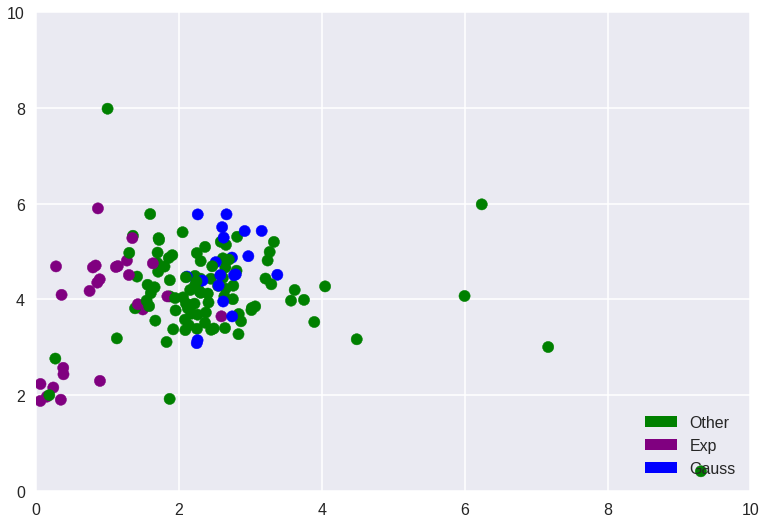

In [8]:
import matplotlib

plt.scatter(parameters["Gamma"].values, parameters["Location"].values, c = total_labels,
            cmap = matplotlib.colors.ListedColormap(gamma_colors))
#pused to plot class labels
recs = []
for i in range(0,len(gamma_colors)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=gamma_colors[i]))
plt.legend(recs,["Other", "Exp", "Gauss"],loc=4)

plt.xlim([0,10])
plt.ylim([0,10])

In [9]:
# could you cluster the systems?
import hdbscan

0.0108139514923
[-1  0  1  2]


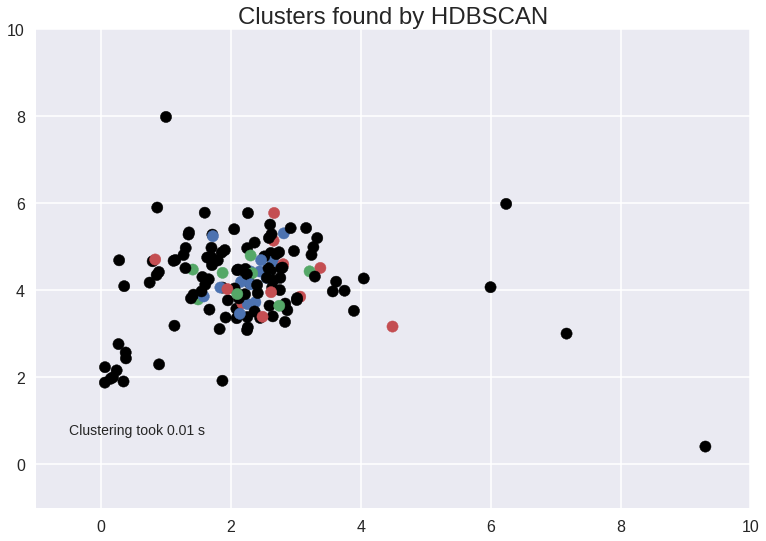

In [10]:
#tried clustering on all the features, played around with some of the parameters, 
# did not really seem to make a difference

start_time = time.time()
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, alpha = 1.0)# (*args, **kwds).fit_predict(data)
labels = clusterer.fit_predict(trimmed_sub_short)
end_time = time.time()
print end_time - start_time

palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(parameters["Gamma"].values, parameters["Location"].values,c=colors)
#plt.scatter(trimmed_sub_short["avg_beta12"].values, trimmed_sub_short["avg_beta23"].values,c=colors)

frame = plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str("HDBSCAN")), fontsize=24)
plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
plt.ylim([-1,10])
plt.xlim([-1,10])
print np.unique(labels)

In [69]:
def plot_embedding(X, col, title=None, col1 = 0, col2 = 1 ):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    plt.scatter(X[:, col1], X[:, col2],    c = col)
    if title is not None:
        plt.title(title)

Computing t-SNE embedding


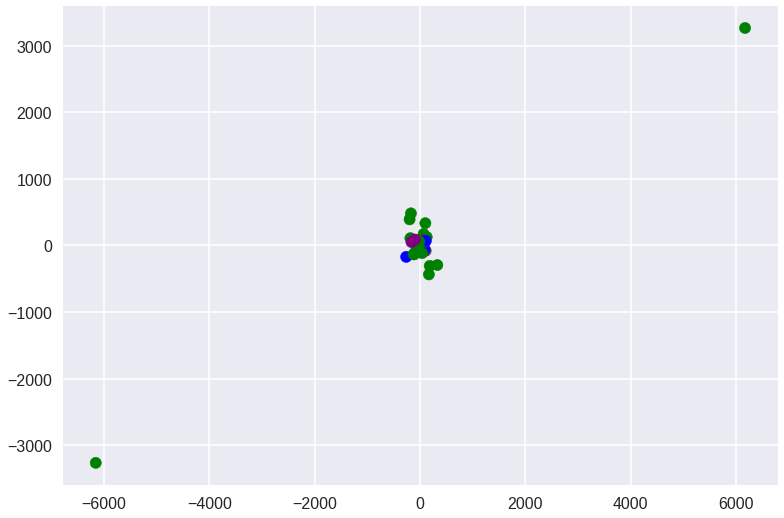

In [19]:
#try tsne to reduce features, and then try clustering again?
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc_X = sc.fit_transform(trimmed_sub_short)
col1 = 1
col2 = 0
components = 5
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=components, init='pca', random_state=0)
t0 = time.time()
X_tsne = tsne.fit_transform(sc_X)

#picked two random asix
plt.figure()
ax = plt.subplot(111)
plt.scatter(X_tsne[:, col1], X_tsne[:, col2],  c = total_labels, 
            cmap = matplotlib.colors.ListedColormap(gamma_colors))

plt.show()

0.00802803039551
[-1  0  1  2]


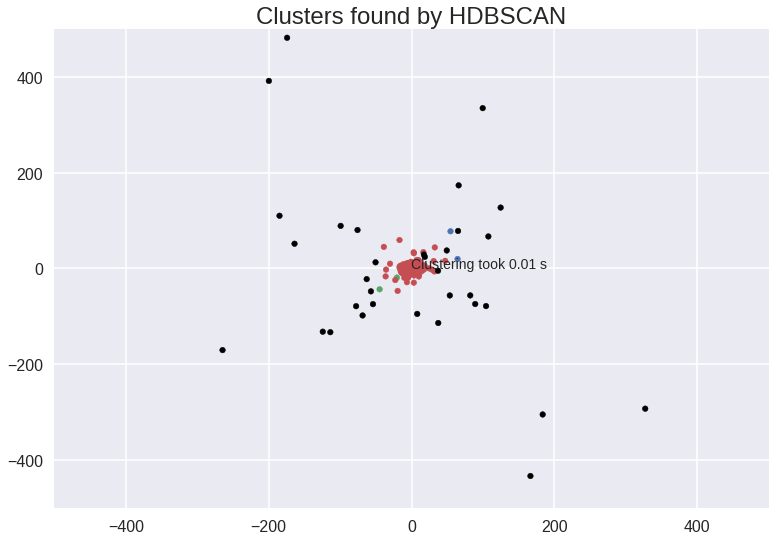

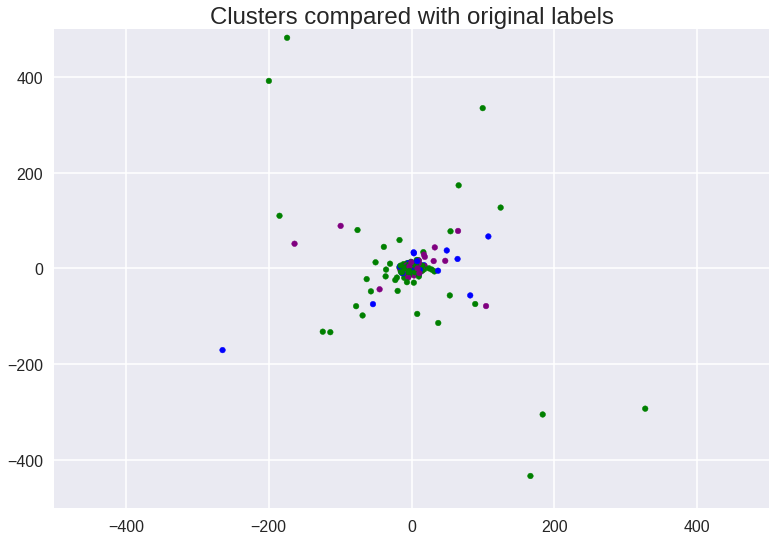

In [27]:
#hdbscan on the tsne reduced features and see if that helps.
start_time = time.time()
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, alpha = 1.0)# (*args, **kwds).fit_predict(data)
labels = clusterer.fit_predict(X_tsne)
end_time = time.time()
print end_time - start_time

palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(X_tsne[:,1], X_tsne[:,0],c=colors, marker=".")
#plt.scatter(trimmed_sub_short["avg_beta12"].values, trimmed_sub_short["avg_beta23"].values,c=colors)

frame = plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str("HDBSCAN")), fontsize=24)
plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
plt.ylim([-500,500])
plt.xlim([-500,500])
print np.unique(labels)
plt.figure()
plt.scatter(X_tsne[:,1], X_tsne[:,0],c=total_labels, 
            cmap = matplotlib.colors.ListedColormap(gamma_colors), marker = ".")
plt.ylim([-500,500])
plt.xlim([-500,500])
plt.title('Clusters compared with original labels', fontsize=24)

#plot with original labels to compare


In [28]:
#try making more coherent plots of the indivual tsne componets
#plot each of the componenets against each other. 
from scipy.misc import comb
ncol, nrow = 3, (comb(components, 2))//3 +1
print nrow, ncol, components, comb(components, 2)
print X_tsne.shape

4.0 3 5 10.0
(145, 5)


10.0


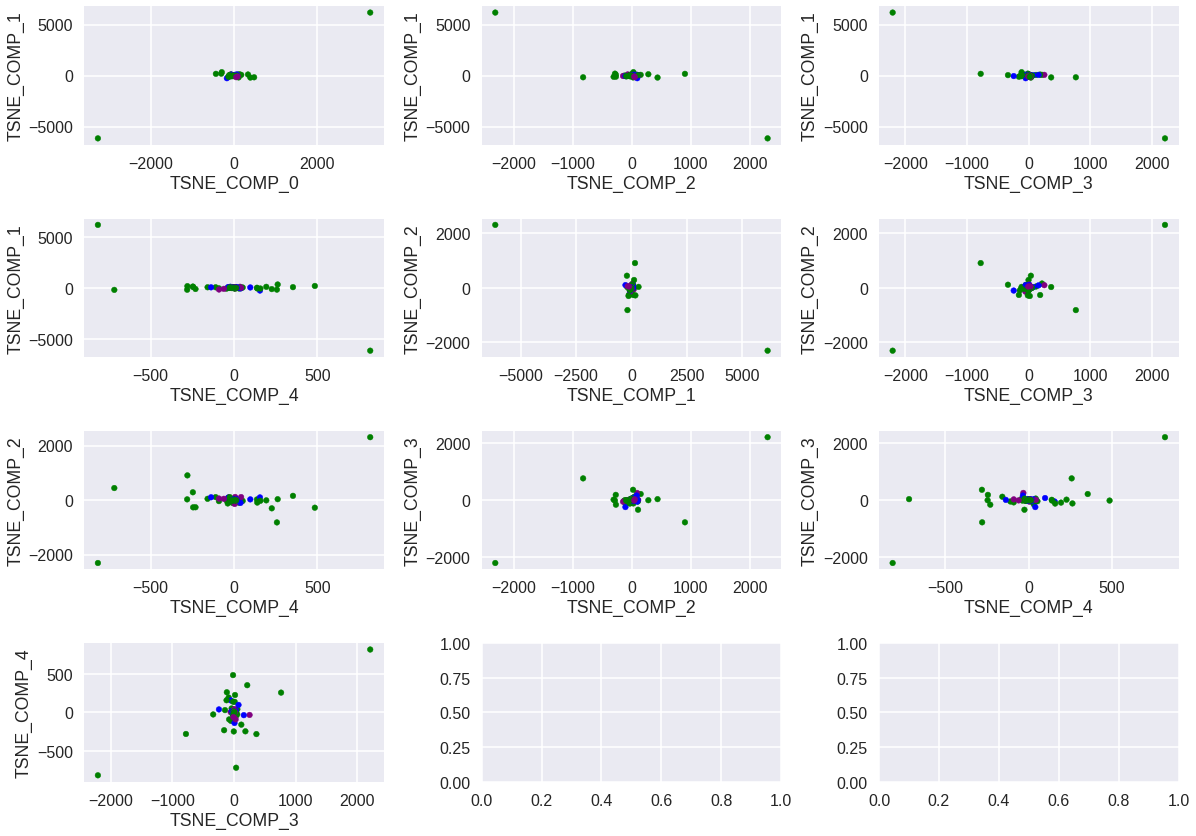

In [29]:
fig, axarr = plt.subplots(ncols=int(ncol),nrows=int(nrow))
fig.set_size_inches((17, nrow*3))
#axarr[0].histogram
col1 = 0
col2 = 1
counter = 0
print comb(components, 2)
for jj in range(int(comb(components, 2))):
    
    #print col1, col2
    #print col1_name, col2_name
    axarr[jj//ncol, jj%ncol ].scatter(X_tsne[:,col1], X_tsne[:,col2], c = total_labels, cmap = matplotlib.colors.ListedColormap(gamma_colors), marker = "." ) #  (x, vals, linewidth = 4, color = "black")
    col1_name = "TSNE_COMP_"+ str(col1)
    col2_name = "TSNE_COMP_"+ str(col2)
    axarr[jj//ncol, jj%ncol ].set_ylabel(col2_name)
    axarr[jj//ncol, jj%ncol ].set_xlabel(col1_name)
    
    if col1!=(components -1):
        col1+=1
    else:
        counter +=1 # account for combinations already done, if we have done 12, don't need to do 21
        col2+=1
        col1=counter
        
    if col2 == col1:
        col1+=1
    #print col1, col2
    #break
fig.tight_layout()
plt.show()

#plt.close(fig)

In [30]:
#try comparing relationship betwen all the beta feats for curiosity
#not possible to do all combinations of two for ~ 100 feats, 100C2 ~ 14000
subset = trimmed_sub_short.columns.values[:10]

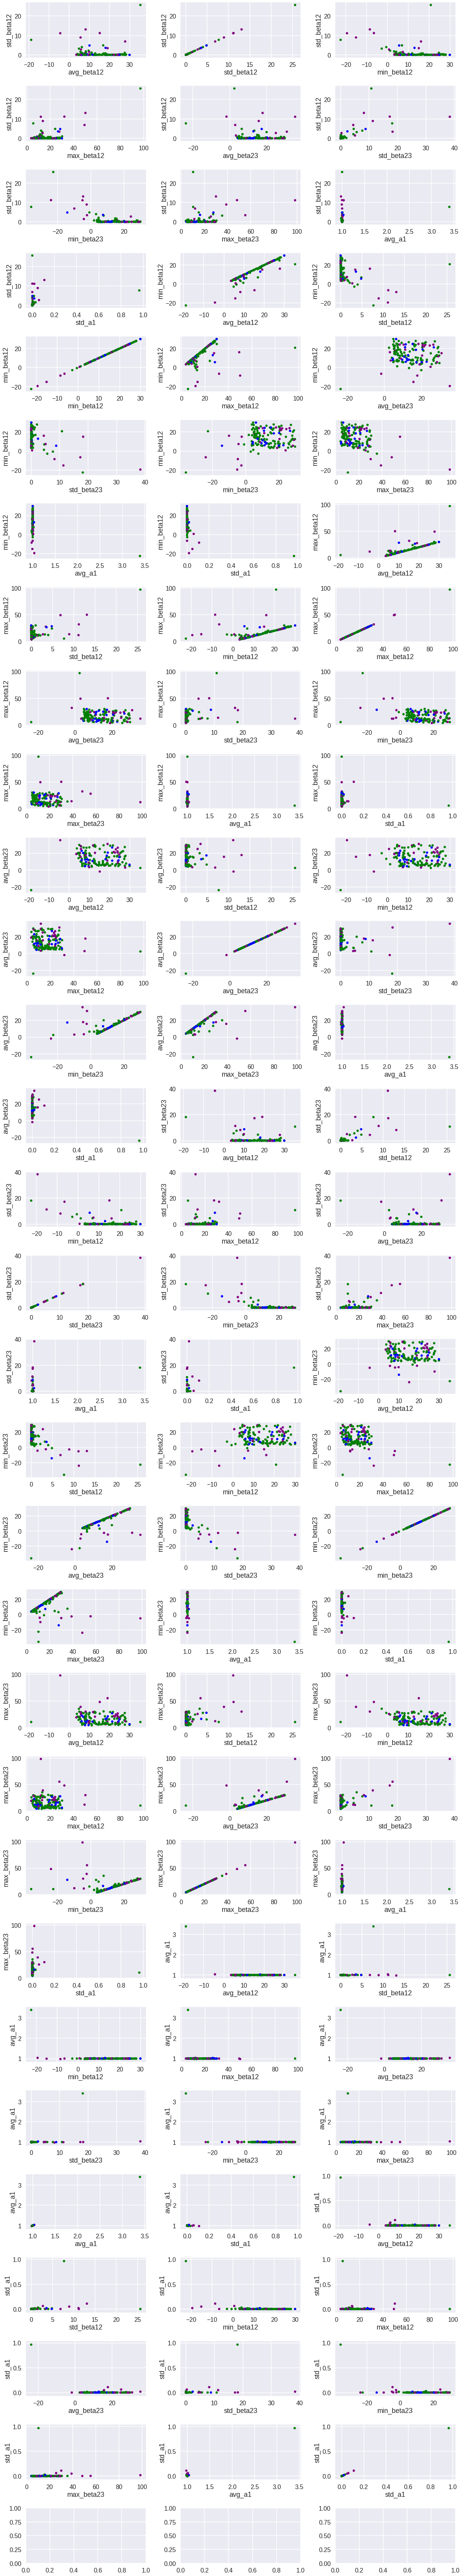

In [150]:
#try making more coherent plots of individual feats pairs
length = len(subset)
#length = 12
ncol, nrow = 3,(length*(length-1))//3 +1
fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
fig.set_size_inches((17, nrow*3))
#axarr[0].histogram
col1 = 0
col2 = 1
for jj in range(length*(length -1)):
    
    col1_name = subset[col1] 
    col2_name = subset[col2]
    #print col1_name, col2_name
    axarr[jj//ncol, jj%ncol ].scatter(trimmed_sub_short[col1_name], trimmed_sub_short[col2_name], c = total_labels, cmap = matplotlib.colors.ListedColormap(gamma_colors), marker = "." ) #  (x, vals, linewidth = 4, color = "black")
    axarr[jj//ncol, jj%ncol ].set_ylabel(col2_name)
    axarr[jj//ncol, jj%ncol ].set_xlabel(col1_name)
    
    if col1!=(length -1):
        col1+=1
    else:
        col2+=1
        col1=0
    #print col1, col2
    #break
fig.tight_layout()
plt.show()

#plt.close(fig)


In [83]:
#plot multiple hists to compare
def plot_hists( planet_systems,title=None):
    #try making more coherent plots
    ncol, nrow = 3,len(planet_systems)//3 +1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    #axarr[0].histogram
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data =pd.read_csv("../../../LongScaleCsvs/"+planet_sys, index_col = 0)
        #print planet_sys, data.shape

        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        gamma, mean, alpha =  parameters[parameters["ID"]==int(name)][["Gamma","Location", "Alpha"]].values[0]
        print gamma, mean, alpha
        x = np.linspace(data["logt"].min(), data["logt"].max(), 100)
        vals = stats.weibull_min.pdf(x,c=gamma,loc=mean,scale = alpha)
        axarr[jj//ncol, jj%ncol ].plot(x, vals, linewidth = 4, color = "black")
        #color = graph[-1].get_color()
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name, alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        #create gaussian on top 
        axarr[jj//ncol, jj%ncol ].set_title(name)
        edges = axarr[jj//ncol, jj%ncol ].axes.get_ylim() 
        #print edges
        if edges[1] > 2:
            print edges
            axarr[jj//ncol, jj%ncol ].set_ylim([0,min(3.5, edges[1])])
        if name == "4641":
            axarr[jj//ncol, jj%ncol ].set_ylim([0,8])
    plt.show()
    if title == None:
        plt.close(fig)
    else:
        fig.savefig("../../Figures/MCMCFigures/"+title, bbox_extent = "tight")
    #plt.close(fig)


Scatter plot of the two exp and dist categories 

41
2.61402658322 4.44752697372 1.28337089098
3.26965544552 4.98914961207 1.12966408388
3.06695012224 3.84985941855 1.29030022806
2.54702721747 4.28144554375 0.979274503073
3.37695706265 4.51093002751 0.831569944396
2.65270242745 4.22105669804 0.978819846003
3.21111918472 4.4324231576 1.16624095452
2.64400431445 3.39776357243 1.05135392281
3.01939511396 3.81699829462 1.29851501136
2.7600829392 4.28340375636 0.448273520387
(0.0, 3.6045403812658647)
2.65726005711 5.13728886605 1.46538545293
3.24078099079 4.81025549516 1.13565806325
3.01433988838 3.77365590319 0.637591073187
(0.0, 4.5456044252724341)
2.61408044648 4.85496344421 1.35672160683
2.59411513227 3.64289930112 1.19610855591
2.83665494256 3.69130160925 1.19995294752
2.63534833805 4.06149715344 1.01444304652
2.75406182147 4.00137774378 1.45905053684
3.32905447447 5.19843231159 1.58498252176
2.64904595098 4.6642954618 1.11821420905
2.74172397001 4.8712372959 1.05484573573
2.80535647276 4.59636363448 0.951374549421
2.81362906986 5.306

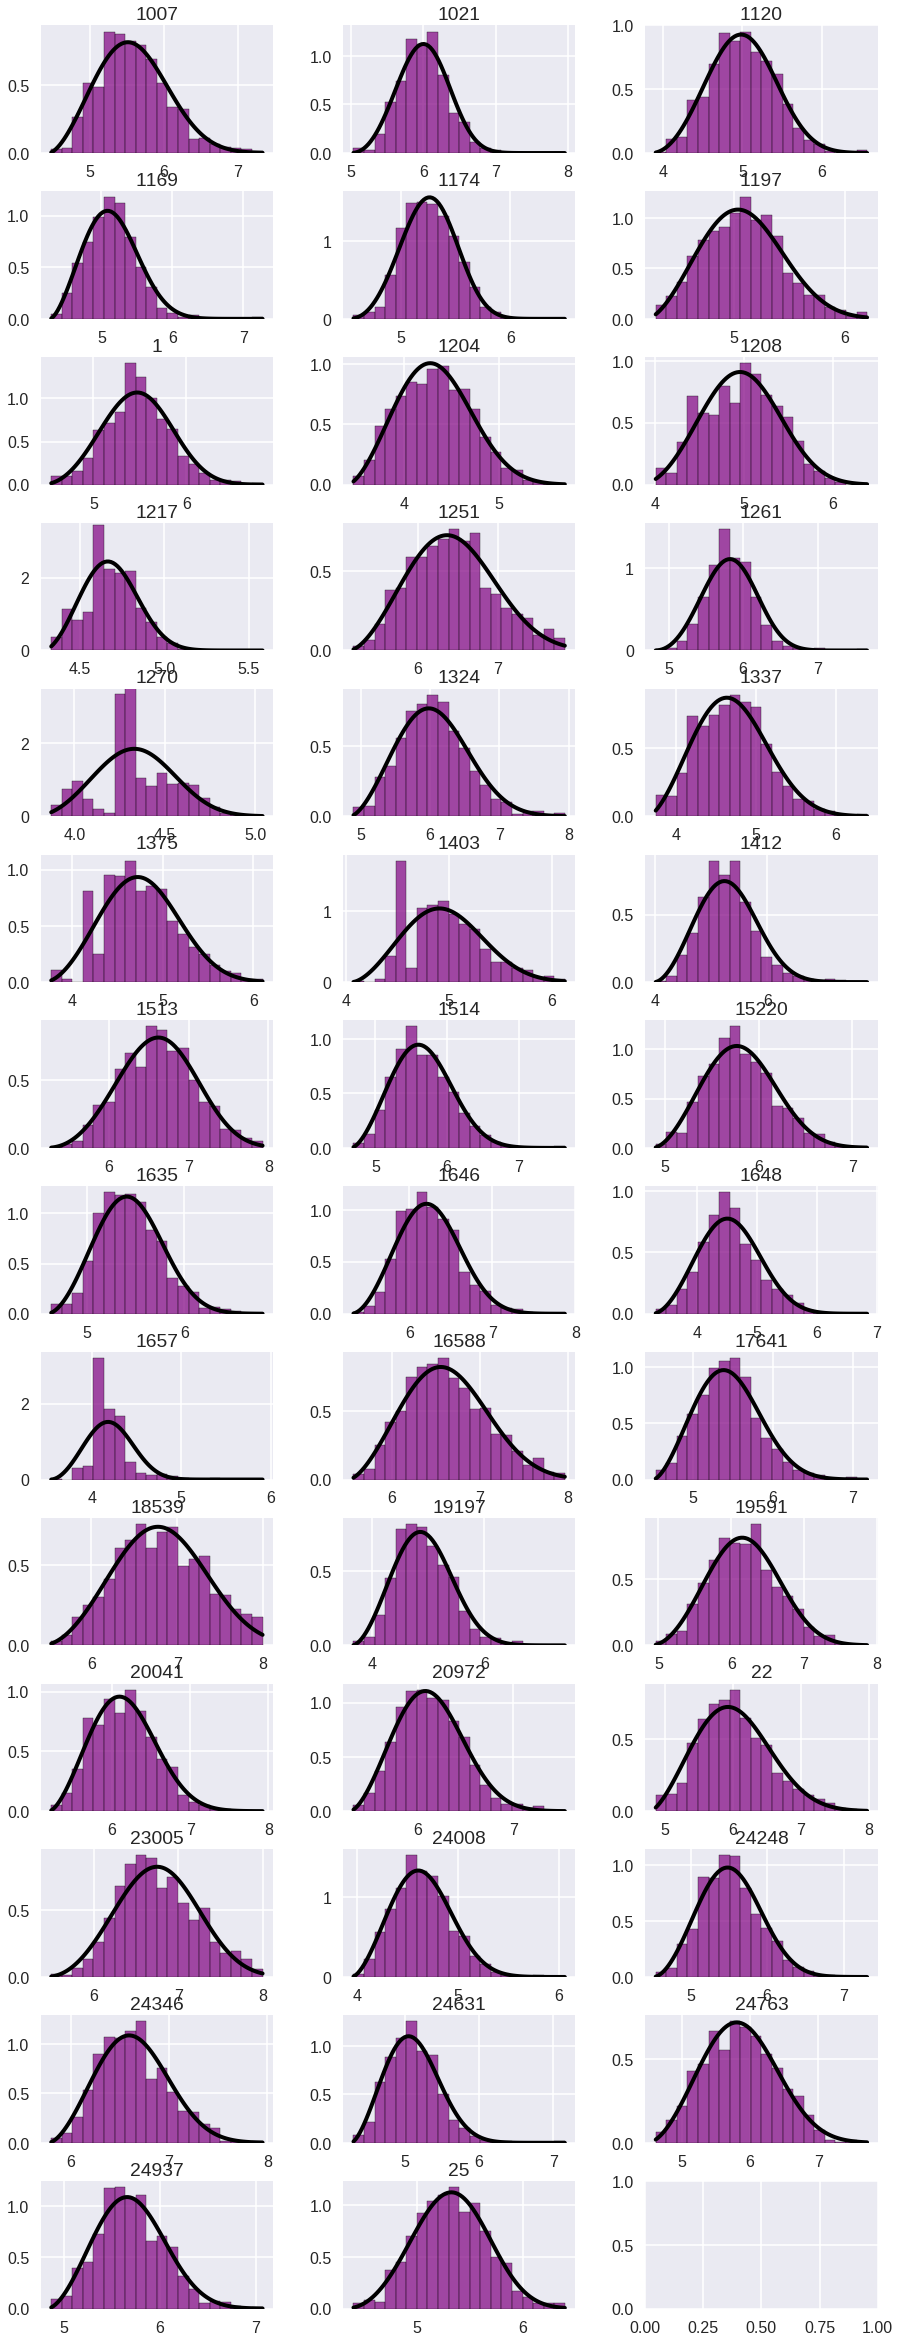

In [207]:
from scipy import stats
#the gaussian plots
good_data = parameters.loc[np.where((parameters["Gamma"]<3.5) * (parameters["Gamma"]>2.5)) ]
good_data_ids = good_data["ID"].astype(int).values.astype(str)
planet_systems = ["Sys_"+x+"_1e8.csv" for x in good_data_ids]
#planet_systems, len(planet_systems)
print len(planet_systems)
plot_hists(planet_systems)
#print good_data.shape

(array([ 27, 139]),)
19
0.0586211711286 1.87403217406 0.422754688861
(0.0, 13540321744.018196)
0.278281876623 4.68683319613 0.0864509926747
(0.0, 138526095.25762394)
0.356003599617 4.0917098157 1.25544125607
(0.0, 19772783.442046687)
0.856103438371 4.34778534259 0.945716956372
(0.0, 2.22648859262805)
0.748105405245 4.1739215789 0.00262561485307
(0.0, 47384.011573363874)
0.890051299254 4.41661187566 0.0336347750484
(0.0, 23.960722505758994)
0.240014879685 2.15480389824 0.43941108944
(0.0, 5.3974304328838851)
0.0603410226057 2.22872177159 6.01120015524e-05
(0.0, 37680884411.343384)
0.345480849508 1.89979801341 0.0479413884444
(0.0, 35.493998177926365)
0.149301365552 1.96414323362 0.302880864437
(0.0, 11.039102560571516)
0.79464514112 4.66478974305 0.461983076594
(0.0, 398.79360550873861)
0.268627133528 2.75990788718 1.78939094186e-05
(0.0, 475430.57299804158)
0.382622581758 2.43107120855 0.14732711058
(0.0, 9.1116053496108051)
0.864943800192 5.89950060664 0.347090446046
(0.0, 87.96461462

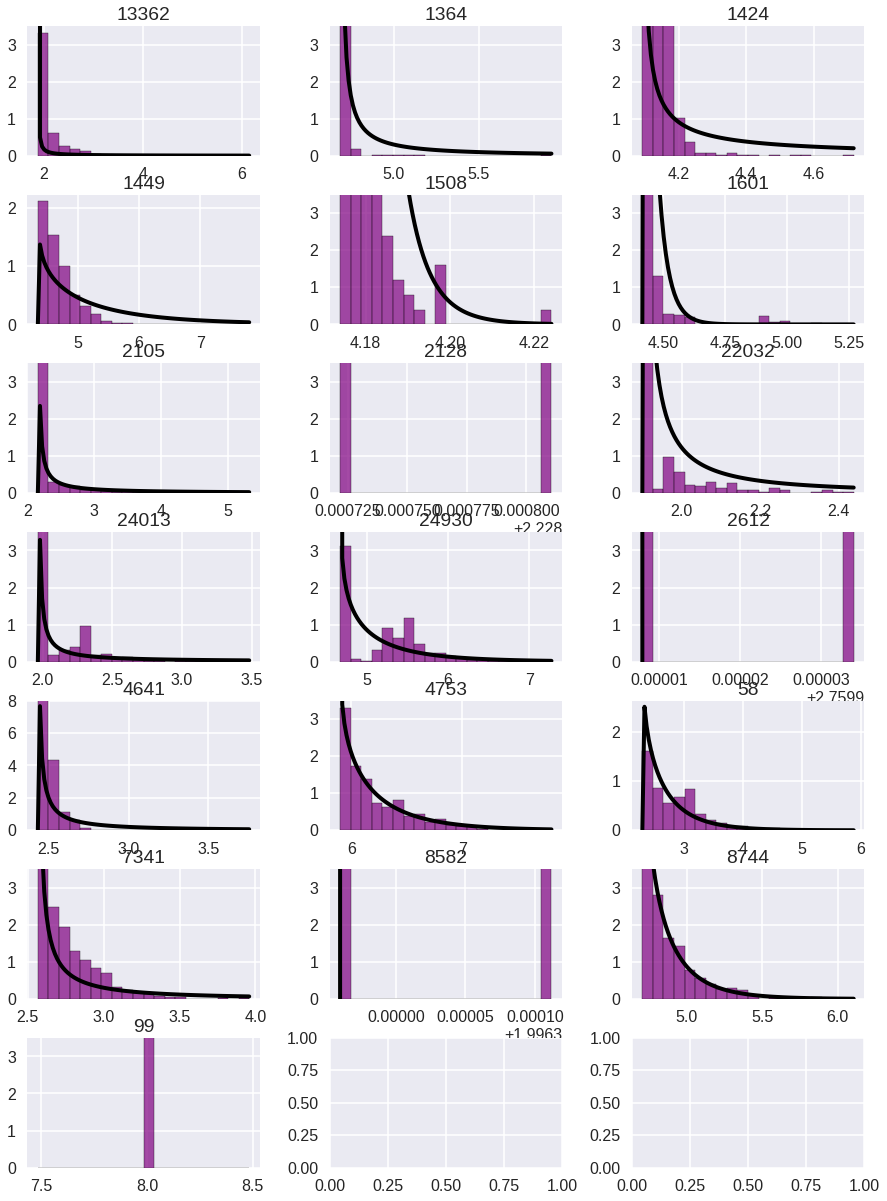

In [209]:
from scipy import stats
#the exp plots
good_data = parameters.loc[np.where(parameters["Gamma"]<1.0)[0]]# * (parameters["Location"]>2.5)) ]
good_data_ids = good_data["ID"].astype(int).values.astype(str)
planet_systems = ["Sys_"+x+"_1e8.csv" for x in good_data_ids]
#planet_systems, len(planet_systems)
print len(planet_systems)
plot_hists(planet_systems)
#print good_data.shape

In [31]:
#since t-sne and pca seem to be different
# tsne supposedly retains local data structure, but pca does not
# https://www.quora.com/What-advantages-does-the-t-SNE-algorithm-have-over-PCA
# i also took a quick look at the pca feats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
components = 10
pca = PCA(n_components=components, random_state=0)
X = StandardScaler().fit_transform(trimmed_sub_short)
pca_X = pca.fit_transform(X)
db = cluster.DBSCAN(eps=0.2, min_samples=5).fit(pca_X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [32]:
import matplotlib.pyplot as plt
print pca_X.shape

(145, 10)


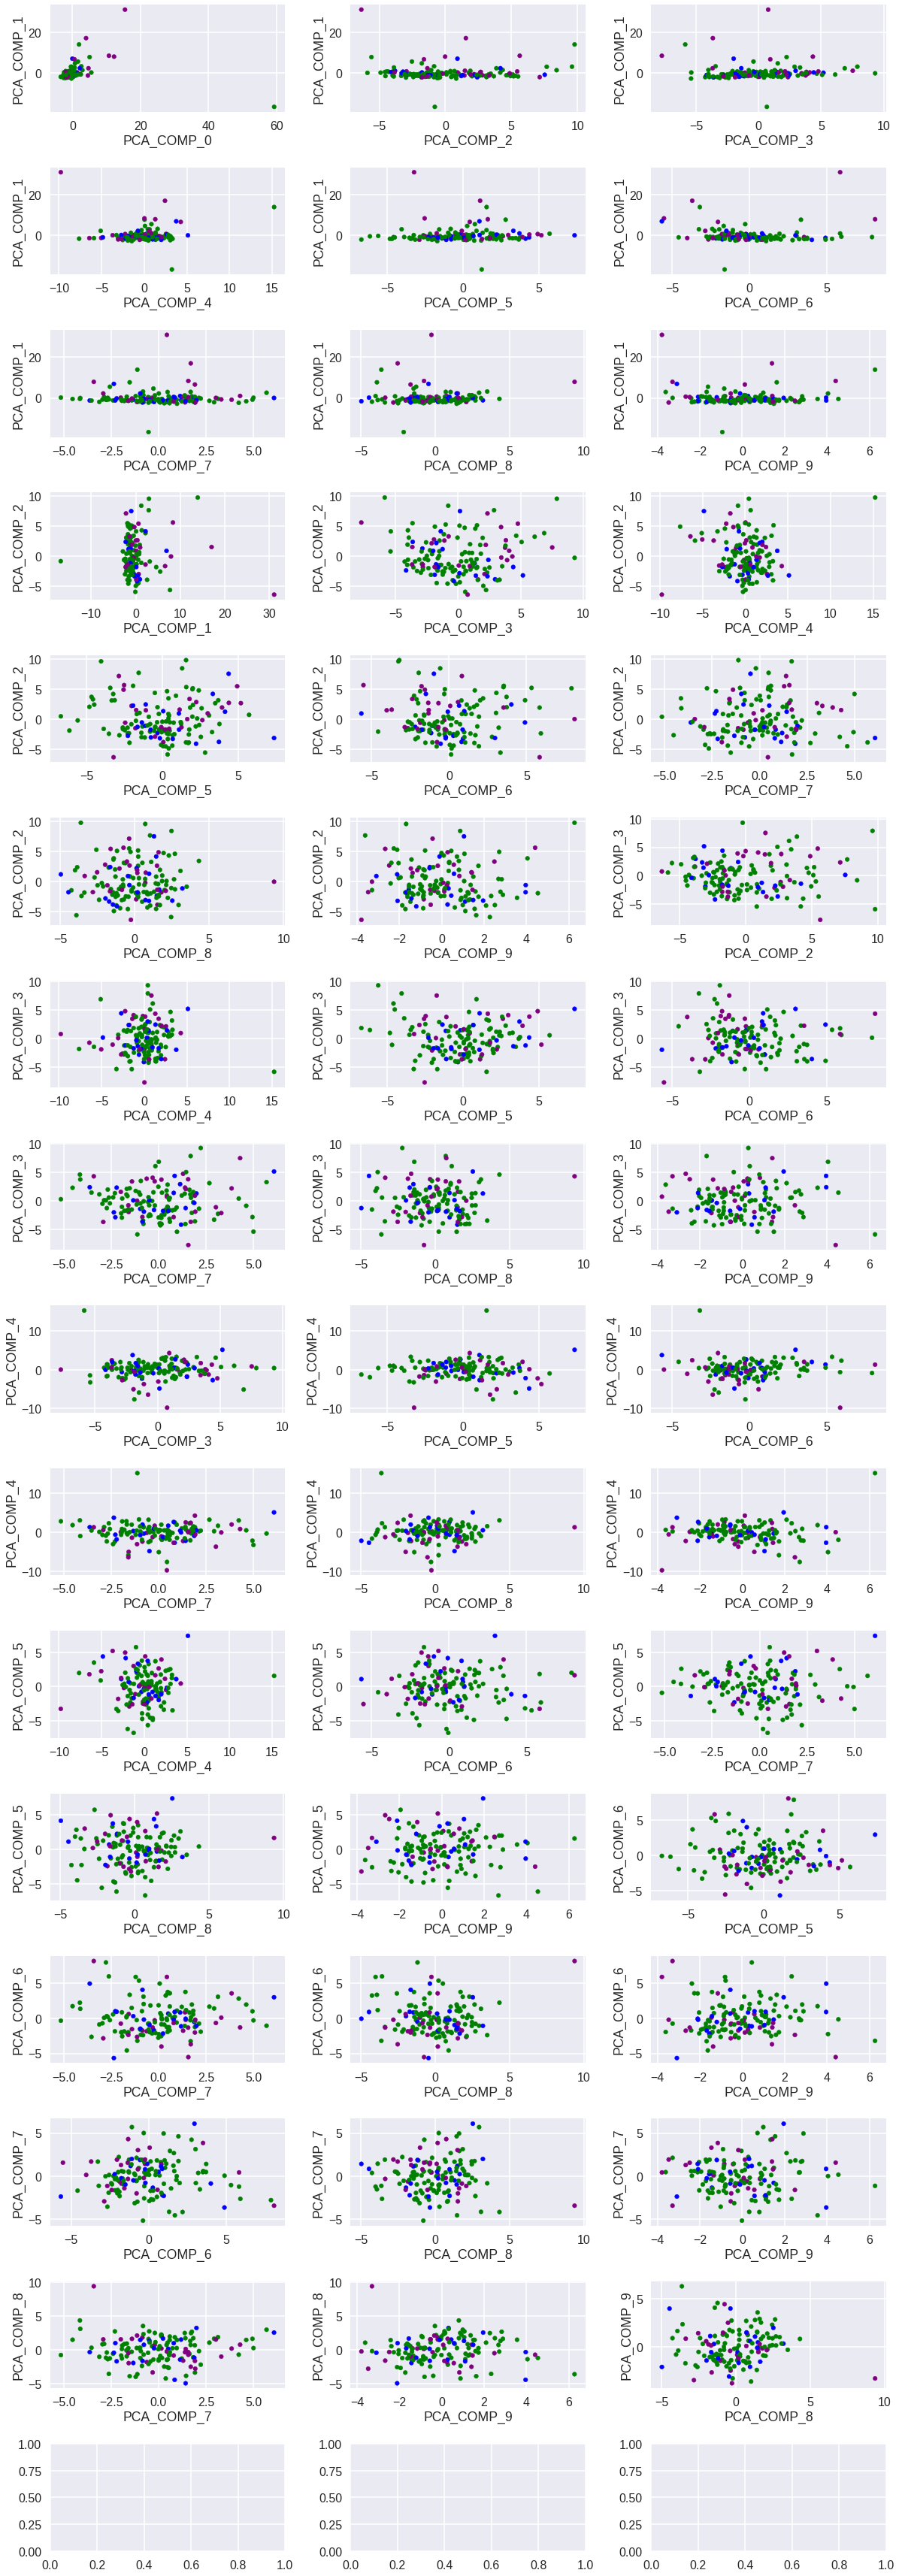

In [172]:
#try making more coherent plots of the indivual pca componets
#plot each of the componenets against each other. 
#length = 12
from scipy.misc import comb
ncol, nrow = 3,(comb(components, 2))//3 +1
fig, axarr = plt.subplots(ncols=int(ncol),nrows=int(nrow))
fig.set_size_inches((17, nrow*3))
#axarr[0].histogram
col1 = 0
col2 = 1
counter = 0
for jj in range(int(comb(components, 2))):
    

    #print col1_name, col2_name
    axarr[jj//ncol, jj%ncol ].scatter(pca_X[:,col1], pca_X[:,col2], c = total_labels, cmap = matplotlib.colors.ListedColormap(gamma_colors), marker = "." ) #  (x, vals, linewidth = 4, color = "black")
    col1_name = "PCA_COMP_"+ str(col1)
    col2_name = "PCA_COMP_"+ str(col2)
    axarr[jj//ncol, jj%ncol ].set_ylabel(col2_name)
    axarr[jj//ncol, jj%ncol ].set_xlabel(col1_name)
    
    if col1!=(components -1):
        col1+=1
    else:
        counter +=1 # account for combinations already done, if we have done 12, don't need to do 21
        col2+=1
        col1=counter
        
    if col2 == col1:
        col1+=1
    #print col1, col2
    #break
fig.tight_layout()
plt.show()

#plt.close(fig)


98 out of  145


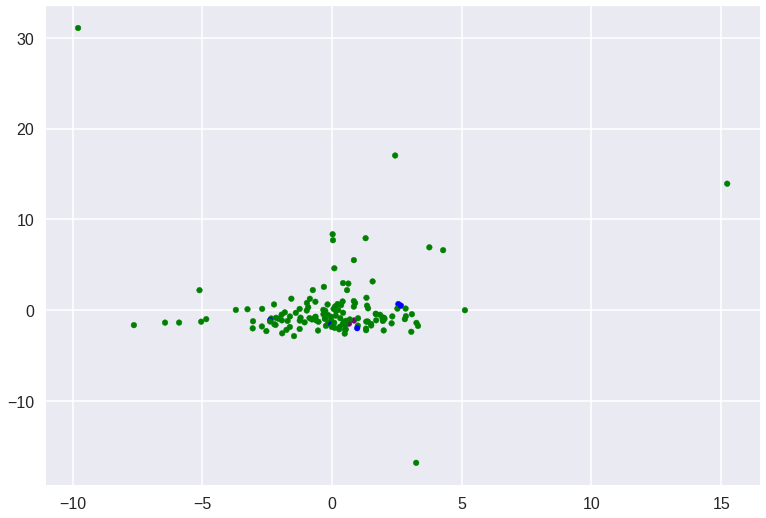

In [233]:
#try spectral clustering, and color based on clusters that it found
#does not currently work
#the colors on this plot correspond to cluster found by analysis, rather than my labels
import sklearn.cluster as cluster
spec_clus =cluster.SpectralClustering(n_clusters=3, random_state=0, n_neighbors= 4)
spec_X = spec_clus.fit_predict(pca_X)
#print spec_X , total_labels


plt.scatter(pca_X[:, 4], pca_X[:,1], c = spec_X, 
            cmap =matplotlib.colors.ListedColormap(gamma_colors), 
           marker = ".")
plt.show()

#IT is interesting to see that it was able to correctly cluster about 2/3 of them 
print len(np.where(spec_X == total_labels)[0]), "out of ", len(spec_X)


#plot underneight is one with my labels

#K_Means# is likely not worth doing if in the individual plots, cant visually discern any clusters


Since determing the distribution in itself seems like a ml -like task  (though this is NOT what we want,  given in the features from one run, so some character X, we want to be able to conclude Y), it was interesting to see to try to fit a tree to it and see what patterns it picked up on to try to split the three classes (exp, gaussian, skewed).
Tried with two different trees, one with the original features, another with the 10, pca feautres

In [46]:
from sklearn import metrics
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier(max_depth=4, random_state=0, criterion="entropy")
dec_tree.fit(trimmed_sub_short, total_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [47]:
#train score
preds = dec_tree.predict(trimmed_sub_short)
print metrics.classification_report(total_labels, preds)

             precision    recall  f1-score   support

          0       0.86      1.00      0.93        99
          1       1.00      0.92      0.96        26
          2       1.00      0.30      0.46        20

avg / total       0.91      0.89      0.87       145



In [48]:
import graphviz

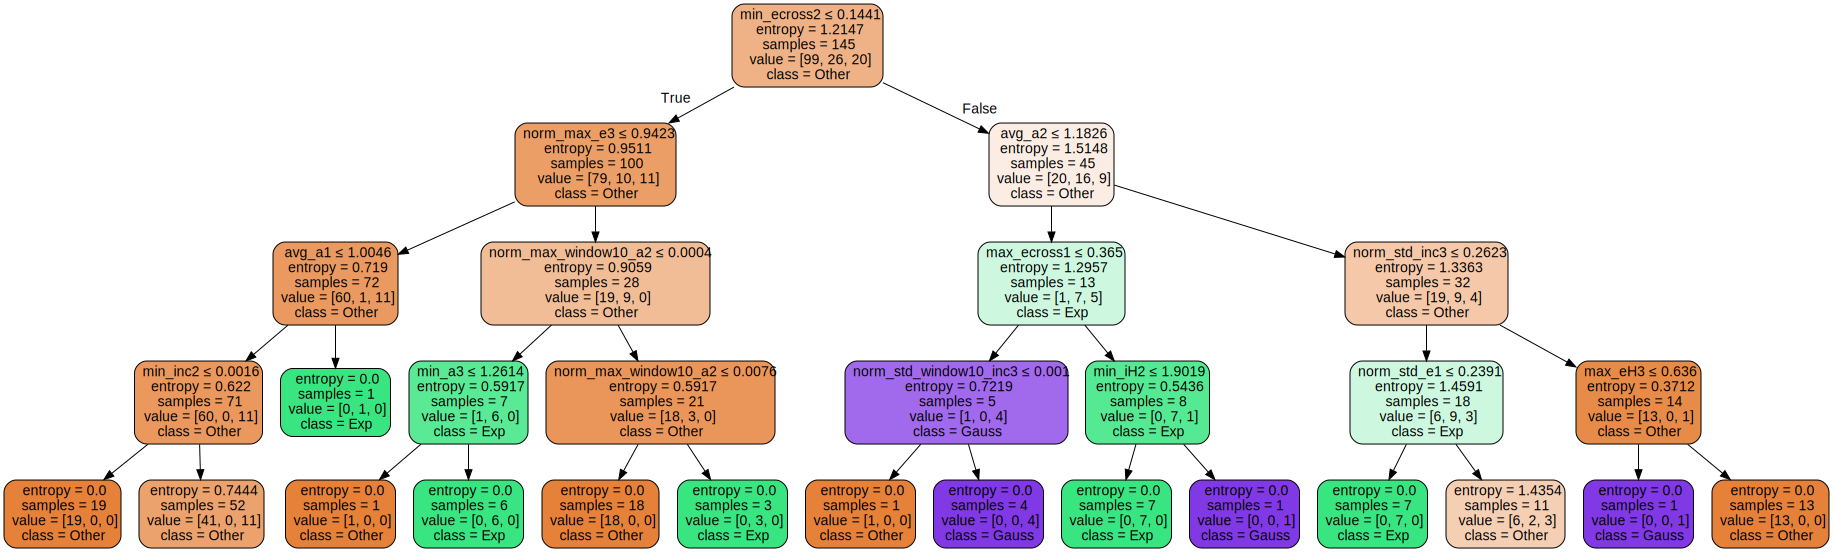

In [49]:
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=trimmed_sub_short.columns.values,  
                         class_names=["Other", "Exp", "Gauss"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


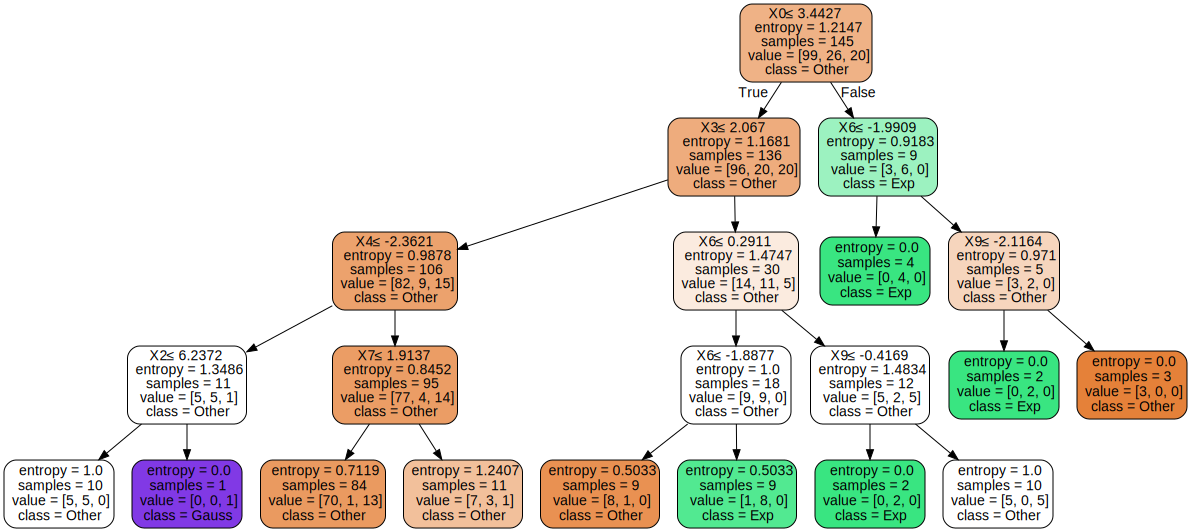

In [50]:
dec_tree.fit(pca_X, total_labels)
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=None,  
                         class_names=["Other", "Exp", "Gauss"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


98 out of  145


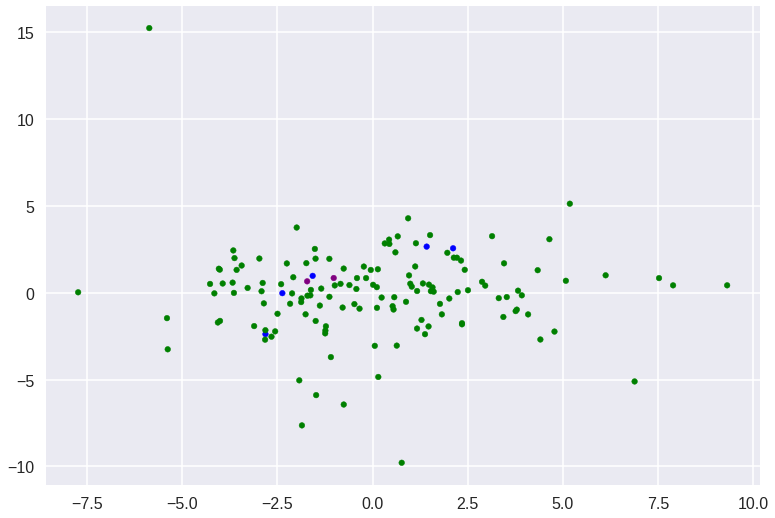

In [67]:
#try KMeans clustering, and color based on clusters that it found
#does not currently work
#the colors on this plot correspond to cluster found by analysis, rather than my labels
k_clus =cluster.KMeans(n_clusters=3, random_state=0, n_init=20, )
k_X = spec_clus.fit_predict(pca_X)
#print k_X.shape
#print spec_X , total_labels

#IT is interesting to see that it was able to correctly cluster about 2/3 of them 
# performance for some reason the same with this compared to spec_X
print len(np.where(k_X == total_labels)[0]), "out of ", len(spec_X)

plt.scatter(pca_X[:, 3], pca_X[:,4], c = k_X, 
            cmap =matplotlib.colors.ListedColormap(gamma_colors), 
           marker = ".")
plt.show()




#plot underneight is one with my labels